In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from helpers import load_data
from cross_validation import cross_validation_step_sgd

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
path_dataset = "../data/data_train.csv"
ratings = load_data(path_dataset)

## Tuning of the SGD model

### Tuning of $\lambda_{item}$

In [ ]:
lambdas = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 
           0.25, 0.275, 0.3, 0.4, 0.5, 0.6, 0.7]

In [ ]:
tr_e_item = []
te_e_item = []

In [ ]:
for i, lambda_ in enumerate(lambdas):
    print('===========')
    print('Lambda {}/{}'.format(i+1, len(lambdas)))
    te, te = cross_validation_step_sgd(ratings,  k_fold=3, lambda_user=0.01, lambda_item=lambda_,
                                       num_epochs=60, gamma=0.02, verbose=False)
    tr_e_item.append(tr)
    te_e_item.append(te)
    print('___________')
    print(tr_e_item[-1], te_e_item[-1])

In [ ]:
d_item = {}

In [ ]:
for i in range(len(lambdas)):
    d_item[(lambdas[i])] = [tr_e_item[i], te_e_item[i]]

In [ ]:
"""with open(b'../data/pickle/cross_validation/test_item_sgd_cross.pickle' , 'wb') as file:
    pickle.dump(d_item, file)"""

In [3]:
with open('../data/pickle/cross_validation/test_item_sgd_cross.pickle', 'rb') as file:
    d_item = pickle.load(file)

In [4]:
lambdas = []
tr_e_item = []
te_e_item = []
for l in d_item.keys():
    lambdas.append(l)
    tr_e_item.append(d_item[l][0])
    te_e_item.append(d_item[l][1])

lambdas, te_e_item, tr_e_item = zip(*sorted(zip(lambdas, te_e_item, tr_e_item)))

In [5]:
best_lambda_item = lambdas[int(np.argmin(te_e_item))]
best_lambda_item

0.25

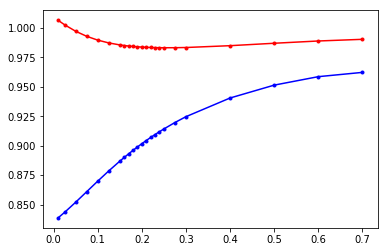

In [6]:
plt.plot(lambdas, tr_e_item, marker=".", color='b', label='Train accuracy')
plt.plot(lambdas, te_e_item, marker=".", color='r', label='Test accuracy')
plt.show()

### Tuning of $\lambda_{user}$

In [ ]:
lambdas = [0.005, 0.007, 0.008, 0.009, 0.01, 0.011, 0.0115, 0.012, 0.0125, 0.013, 0.0135, 0.014, 0.0145,
           0.015, 0.0155, 0.016, 0.017, 0.02, 0.0225, 0.03, 0.0325, 0.04]

In [ ]:
tr_e_user = []
te_e_user = []

In [ ]:
for i, lambda_ in enumerate(lambdas):
    print('===========')
    print('Lambda {}/{}'.format(i+1, len(lambdas)))
    tr, te = cross_validation_step_sgd(ratings,  k_fold=3, lambda_user=lambda_, lambda_item=best_lambda_item,
                                       num_epochs=60, verbose=False, gamma=0.02)
    tr_e_item.append(tr)
    te_e_item.append(te)
    print('___________')
    print(tr_e_item[-1], te_e_item[-1])

In [ ]:
d_user = {}

In [ ]:
for i in range(len(lambdas)):
    d_user[(lambdas[i])] = [tr_e_user[i], te_e_user[i]]

In [ ]:
"""with open(b'../data/pickle/cross_validation/test_user_sgd_cross.pickle' , 'wb') as file:
    pickle.dump(d_user, file)"""

In [7]:
with open('../data/pickle/cross_validation/test_user_sgd_cross.pickle', 'rb') as file:
    d_user = pickle.load(file)

In [8]:
lambdas = []
tr_e_user = []
te_e_user = []
for l in d_user.keys():
    lambdas.append(l)
    tr_e_user.append(d_user[l][0])
    te_e_user.append(d_user[l][1])

lambdas, te_e_user, tr_e_user = zip(*sorted(zip(lambdas, te_e_user, tr_e_user)))

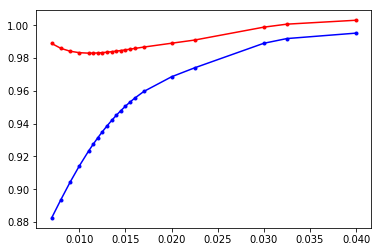

In [9]:
plt.plot(lambdas, tr_e_user, marker=".", color='b', label='Train accuracy')
plt.plot(lambdas, te_e_user, marker=".", color='r', label='Test accuracy')
plt.show()

In [10]:
best_lambda_user = lambdas[int(np.argmin(te_e_user))]
best_lambda_user

0.011